# Logistic Regression with unbalanced Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/drive/MyDrive/GiveMeSomeCredit/cs-training.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
mean_income = df.loc[(df.MonthlyIncome.notnull())].MonthlyIncome.mean()
mean_dependent = int(df.loc[(df.NumberOfDependents.notnull())].NumberOfDependents.mean())

In [4]:
df.MonthlyIncome = df.MonthlyIncome.fillna(mean_income)
df.NumberOfDependents = df.NumberOfDependents.fillna(mean_dependent)

In [6]:
df.isna().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [7]:
for column in df.columns:
    df[column] = df[column] / df[column].abs().max()

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,2:], df.iloc[:,1], stratify = df.iloc[:,1], test_size = 0.33)

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept=True, max_iter = 10000000, verbose = True)

In [11]:
lr.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


LogisticRegression(max_iter=10000000, verbose=True)

In [13]:
lr.predict_proba(x_train)

array([[0.9497279 , 0.0502721 ],
       [0.95258587, 0.04741413],
       [0.92616735, 0.07383265],
       ...,
       [0.96466449, 0.03533551],
       [0.97894064, 0.02105936],
       [0.9706817 , 0.0293183 ]])

In [14]:
from sklearn.metrics import confusion_matrix as cf
cf1 = cf(lr.predict(x_test), y_test)


In [15]:
cf1

array([[46154,  3259],
       [   37,    50]])

In [17]:
ss1 = cf1[0][0]/(cf1[0][0] + cf1[1][0])
sp1 = cf1[1][1]/(cf1[0][1] + cf1[1][1])
print(f"True healthy credit = {ss1}, True Serious Distress = {sp1}")

True healthy credit = 0.9991989781559178, True Serious Distress = 0.015110305228165609


In [41]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, random_state=0, max_depth=20, verbose = True)
clf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.5s finished


RandomForestClassifier(max_depth=20, random_state=0, verbose=True)

In [42]:
cff = cf(y_test, clf.predict(x_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


In [43]:
print(cff)
ss1 = cff[0][0]/(cff[0][0] + cff[0][1])
sp1 = cff[1][1]/(cff[1][0] + cff[1][1])
print(f"True healthy credit = {ss1}, True Serious Distress = {sp1}")

[[45702   489]
 [ 2702   607]]
True healthy credit = 0.9894135221146977, True Serious Distress = 0.1834391054699305


In [37]:
df_fraud = df.loc[df.SeriousDlqin2yrs == 1]
df_safe = df.loc[df.SeriousDlqin2yrs == 0]

In [ ]:
print(df_fraud.shape)
print(df_safe.shape)

(10026, 12)
(139974, 12)


In [ ]:
df_safe_sampled = df_safe.sample(df_fraud.shape[0])

In [ ]:
df_combined = pd.concat((df_safe_sampled, df_fraud), axis=0)
df_combined.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
35572,0.237153,0.0,2.328534e-06,0.513761,0.000000,3.712871e-03,0.002217,0.086207,0.0,0.018519,0.0,0.00
84906,0.566047,0.0,0.000000e+00,0.284404,0.000000,4.664514e-07,0.000691,0.137931,0.0,0.000000,0.0,0.00
86292,0.575287,0.0,3.762413e-07,0.495413,0.000000,1.104155e-03,0.002217,0.120690,0.0,0.018519,0.0,0.00
32243,0.214960,0.0,1.422426e-05,0.504587,0.010204,1.209085e-06,0.001227,0.155172,0.0,0.000000,0.0,0.05
133779,0.891867,0.0,2.663572e-06,0.376147,0.010204,7.028890e-07,0.002049,0.086207,0.0,0.018519,0.0,0.00


In [ ]:
df_combined = df_combined.sample(frac=1).reset_index(drop=True)
df_combined.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.134380,0.0,4.177961e-06,0.568807,0.0,0.000001,0.001392,0.172414,0.0,0.018519,0.000000,0.00
1,0.505387,1.0,7.249775e-06,0.339450,0.0,0.007674,0.002217,0.103448,0.0,0.037037,0.020408,0.05
2,0.422313,1.0,1.074690e-05,0.412844,0.0,0.000001,0.002595,0.206897,0.0,0.037037,0.000000,0.05
3,0.552507,0.0,8.711875e-07,0.623853,0.0,0.000130,0.002217,0.068966,0.0,0.000000,0.000000,0.00
4,0.973027,0.0,1.026072e-05,0.568807,0.0,0.007820,0.002217,0.327586,0.0,0.018519,0.000000,0.00


In [ ]:
lr2 = LogisticRegression(fit_intercept=True, max_iter = 10000000, verbose = True)

In [ ]:
lr2.fit(df_combined.iloc[:,2:], df_combined.iloc[:,1])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(max_iter=10000000, verbose=True)

In [ ]:
y_comb_pred = lr2.predict(df.iloc[:,2:])
cf2 = cf(y_comb_pred, df.iloc[:,1])

In [ ]:
ss2 = cf2[0][0]/(cf2[0][0] + cf2[1][0])
sp2 = cf2[1][1]/(cf2[0][1] + cf2[1][1])
print(f"Sensitivity = {ss2}, Specificity = {sp2}")

Sensitivity = 0.636996870847443, Specificity = 0.6758428086973868


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/GiveMeSomeCredit/cs-test.csv")

In [ ]:
df_test.MonthlyIncome = df_test.MonthlyIncome.fillna(mean_income)
df_test.NumberOfDependents = df_test.NumberOfDependents.fillna(mean_dependent)
df_test.isna().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

In [ ]:
pred = lr2.predict_proba(df_test.iloc[:,2:])

In [ ]:
pred_df = pd.DataFrame(zip(df_test.iloc[:,0], pred[:,1]), columns=["Id", "Probability"])
pred_df = pred_df.set_index("Id")

In [ ]:
pred_df.to_csv(path_or_buf="/content/drive/MyDrive/GiveMeSomeCredit/pred.csv", index_label=None)

In [ ]:
pred_df.head()

,Probability
Id,
1,0.373897
2,0.411798
3,0.393608
4,0.514182
5,0.445494


# Through MLP Classifier

In [44]:
from sklearn.neural_network import MLPClassifier

In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [53]:
y_train_onehot = pd.get_dummies(y_train)

In [47]:
mlp1 = MLPClassifier(verbose  = True)

In [48]:
mlp1.fit(x_train, y_train_onehot)

Iteration 1, loss = 0.56990356
Iteration 2, loss = 0.46829050
Iteration 3, loss = 0.45682052
Iteration 4, loss = 0.44057072
Iteration 5, loss = 0.42146006
Iteration 6, loss = 0.40567508
Iteration 7, loss = 0.39638287
Iteration 8, loss = 0.39114773
Iteration 9, loss = 0.38796157
Iteration 10, loss = 0.38526148
Iteration 11, loss = 0.38336224
Iteration 12, loss = 0.38179349
Iteration 13, loss = 0.38064935
Iteration 14, loss = 0.37962536
Iteration 15, loss = 0.37902238
Iteration 16, loss = 0.37837933
Iteration 17, loss = 0.37787568
Iteration 18, loss = 0.37750652
Iteration 19, loss = 0.37714710
Iteration 20, loss = 0.37695099
Iteration 21, loss = 0.37649431
Iteration 22, loss = 0.37653305
Iteration 23, loss = 0.37636007
Iteration 24, loss = 0.37620186
Iteration 25, loss = 0.37616803
Iteration 26, loss = 0.37621254
Iteration 27, loss = 0.37598248
Iteration 28, loss = 0.37580808
Iteration 29, loss = 0.37575919
Iteration 30, loss = 0.37574010
Iteration 31, loss = 0.37587455
Iteration 32, los

MLPClassifier(verbose=True)

In [60]:
y_comb_pred = mlp1.predict(x_test)
cf3 = cf(y_test, y_comb_pred[:,1])
ss3 = cf3[0][0]/(cf3[0][0] + cf3[0][1])
sp3 = cf3[1][1]/(cf3[1][0] + cf3[1][1])
print(f"True healthy credit = {ss3}, True distress = {sp3}")
print(cf3)

True healthy credit = 0.990669177978394, True distress = 0.1834391054699305
[[45760   431]
 [ 2702   607]]


# LR with Data Augmentation through VAE

In [61]:
import keras
from keras import layers

In [62]:
original_dim = 10 * 1
intermediate_dim = 100
latent_dim = 10

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
intermediate = keras.Model(inputs, h)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [63]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [64]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [65]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='nadam')

In [66]:
df_fraud.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,10026.000000,10026.0,10026.000000,10026.000000,10026.000000,1.002600e+04,10026.000000,10026.000000,10026.000000,10026.000000,10026.000000,10026.000000
mean,0.503024,1.0,0.000086,0.421345,0.024372,8.952178e-04,0.001929,0.135902,0.021340,0.018306,0.018654,0.046564
std,0.289000,0.0,0.002600,0.118498,0.119740,3.756432e-03,0.001877,0.097476,0.120028,0.026402,0.119929,0.060747
min,0.000007,1.0,0.000000,0.192661,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255048,1.0,0.000008,0.330275,0.000000,5.884156e-07,0.001064,0.068966,0.000000,0.000000,0.000000,0.000000
50%,0.501887,1.0,0.000017,0.412844,0.000000,1.298980e-06,0.001742,0.120690,0.000000,0.018519,0.000000,0.000000
75%,0.753080,1.0,0.000020,0.495413,0.020408,2.706909e-06,0.002217,0.189655,0.010204,0.037037,0.010204,0.100000
max,0.999867,1.0,0.164234,0.926606,1.000000,1.176744e-01,0.083091,0.982759,1.000000,0.537037,1.000000,0.400000


In [67]:
x_train = df_fraud.iloc[:,2:]
vae.fit(x_train, x_train,
        epochs=1000,
        batch_size=256,
        validation_data=(x_train, x_train),
        verbose = True)

Epoch 1/1000
40/40 [==============================] - 3s 11ms/step - loss: 5.9190 - val_loss: 3.8963
Epoch 2/1000
40/40 [==============================] - 0s 6ms/step - loss: 2.9206 - val_loss: 2.3663
Epoch 3/1000
40/40 [==============================] - 0s 6ms/step - loss: 2.1488 - val_loss: 1.9834
Epoch 4/1000
40/40 [==============================] - 0s 6ms/step - loss: 1.8861 - val_loss: 1.8058
Epoch 5/1000
40/40 [==============================] - 0s 6ms/step - loss: 1.7523 - val_loss: 1.7085
Epoch 6/1000
40/40 [==============================] - 0s 6ms/step - loss: 1.6780 - val_loss: 1.6518
Epoch 7/1000
40/40 [==============================] - 0s 7ms/step - loss: 1.6351 - val_loss: 1.6184
Epoch 8/1000
40/40 [==============================] - 0s 7ms/step - loss: 1.6030 - val_loss: 1.5891
Epoch 9/1000
40/40 [==============================] - 0s 6ms/step - loss: 1.5800 - val_loss: 1.5709
Epoch 10/1000
40/40 [==============================] - 0s 7ms/step - loss: 1.5631 - val_loss: 1.555

In [68]:
mean, sigma, z_ = encoder.predict(np.array(x_train))

In [69]:
mean.shape

(10026, 10)

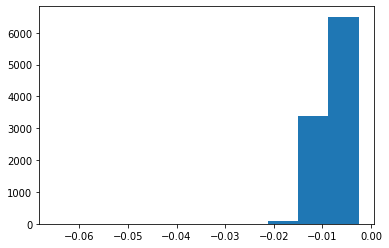

In [84]:
plt.hist(sigma[:,3])
plt.show()

In [85]:
z1 = sampling([mean,sigma])

In [ ]:
#picking up one datapoint
pt = 99 #chosen datapoint
 ## these are the random variable of two latent variable for chosen dataset. 
zn

array([ 0.16797677, -0.14311315, -0.05082136, -0.07853793, -0.16357855,
       -0.2524402 , -0.1836609 ,  0.03642496,  0.2896933 ,  0.11448614],
      dtype=float32)

In [89]:
from tqdm import tqdm
import tensorflow as tf
size = df.shape[0] - df_fraud.shape[0]
gen = []
for i in tqdm(range(size)):
    zn = list(z1[i%10025])
    sample = tf.random.normal([1], mean=0.05, stddev=-0.01, dtype=tf.dtypes.float32,\
                        seed=None, name=None) #This samples from normal dist of first latent variable
    zn[3] = sample
    gen.append(zn)

100%|██████████| 139974/139974 [04:40<00:00, 498.70it/s]


In [90]:
df_ones = pd.DataFrame()
df_ones[df.columns[1]] = np.ones(size)
df_ones.head()

,SeriousDlqin2yrs
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [91]:
df_generated = pd.DataFrame(np.array(decoder(np.array(gen))))
df_generated.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [ ]:
df_generated.columns = df.columns[2:]

In [ ]:
df_final = pd.concat((df_ones, df_generated), axis = 1)
df_final["SeriousDlqin2yrs"] = df_final["SeriousDlqin2yrs"].astype('int')
df_final.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float32
age                                     float32
NumberOfTime30-59DaysPastDueNotWorse    float32
DebtRatio                               float32
MonthlyIncome                           float32
NumberOfOpenCreditLinesAndLoans         float32
NumberOfTimes90DaysLate                 float32
NumberRealEstateLoansOrLines            float32
NumberOfTime60-89DaysPastDueNotWorse    float32
NumberOfDependents                      float32
dtype: object

In [ ]:
df_final_augmented = pd.concat((df_final,df.iloc[:,1:]), axis = 0)
df_final_augmented = df_final_augmented.sample(frac=1).reset_index(drop=True)
df_final_augmented.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.000003,0.266055,0.000000,5.853470e-07,0.001994,0.103448,0.000000,0.037037,0.000000,0.100000
1,1.0,0.000267,0.458089,0.014293,1.174051e-03,0.002149,0.183350,0.035246,0.030018,0.011374,0.000046
2,0.0,0.000000,0.422018,0.010204,6.914750e-08,0.001662,0.120690,0.010204,0.000000,0.000000,0.100000
3,0.0,0.000004,0.669725,0.000000,6.694722e-07,0.002039,0.155172,0.000000,0.000000,0.000000,0.050000
4,1.0,0.000263,0.468732,0.013847,1.175987e-03,0.002152,0.182978,0.034987,0.030460,0.011020,0.000041


In [ ]:
lr3 = LogisticRegression(fit_intercept=True, max_iter = 10000000, verbose = True)
lr3.fit(df_final_augmented.iloc[:,1:], df_final_augmented.iloc[:,0])
y_comb_pred = lr3.predict(df_final_augmented.iloc[:,1:])
cf2 = cf(y_comb_pred, df_final_augmented.iloc[:,0])
ss2 = cf2[0][0]/(cf2[0][0] + cf2[1][0])
sp2 = cf2[1][1]/(cf2[0][1] + cf2[1][1])
print(f"Sensitivity = {ss2}, Specificity = {sp2}")
print(cf2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished


Sensitivity = 0.9901910354780173, Specificity = 0.9434866666666667
[[138601   8477]
 [  1373 141523]]


In [ ]:
mlp3 = MLPClassifier(verbose = True)
mlp3.fit(df_final_augmented.iloc[:,1:], df_final_augmented.iloc[:,0])

Iteration 1, loss = 0.35451388
Iteration 2, loss = 0.13585953
Iteration 3, loss = 0.11189178
Iteration 4, loss = 0.10737141
Iteration 5, loss = 0.10630238
Iteration 6, loss = 0.10575068
Iteration 7, loss = 0.10523520
Iteration 8, loss = 0.10479361
Iteration 9, loss = 0.10446090
Iteration 10, loss = 0.10436884
Iteration 11, loss = 0.10403472
Iteration 12, loss = 0.10366301
Iteration 13, loss = 0.10348339
Iteration 14, loss = 0.10324769
Iteration 15, loss = 0.10307601
Iteration 16, loss = 0.10288050
Iteration 17, loss = 0.10276235
Iteration 18, loss = 0.10256554
Iteration 19, loss = 0.10241945
Iteration 20, loss = 0.10238511
Iteration 21, loss = 0.10210686
Iteration 22, loss = 0.10210438
Iteration 23, loss = 0.10186036
Iteration 24, loss = 0.10177390
Iteration 25, loss = 0.10169417
Iteration 26, loss = 0.10151752
Iteration 27, loss = 0.10139714
Iteration 28, loss = 0.10142651
Iteration 29, loss = 0.10126505
Iteration 30, loss = 0.10121285
Iteration 31, loss = 0.10113597
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- SeriousDlqin2yrs
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
y_comb_pred = mlp3.predict(df.iloc[:,2:])
cf3 = cf(df.iloc[:,1], y_comb_pred)
ss3 = cf3[0][0]/(cf3[0][0] + cf3[0][1])
sp3 = cf3[1][1]/(cf3[1][0] + cf3[1][1])
print(f"Sensitivity = {ss3}, Specificity = {sp3}")
print(cf3)

Sensitivity = 0.9861474273793704, Specificity = 0.22790744065429883
[[138035   1939]
 [  7741   2285]]


In [ ]:
for column in df_test.columns[2:]:
    df_test[column] = df_test[column] / df_test[column].abs().max()

In [ ]:
pred = mlp3.predict_proba(df_test.iloc[:,2:])
pred_df = pd.DataFrame(zip(df_test.iloc[:,0], pred[:,1]), columns=["Id", "Probability"])
pred_df = pred_df.set_index("Id")
pred_df.to_csv(path_or_buf="/content/drive/MyDrive/GiveMeSomeCredit/pred_aug_mlp.csv", index_label=None)